In [2]:
pip install emoji


     |████████████████████████████████| 51kB 1.8MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=c3ebe4b4ccb734c0633483a6c0d5a84c24fc2ca933ebe8361e9cea9242c6defb
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [26]:
import re
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline


In [43]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    
    if result:
        return True
    return False


In [44]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [45]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [67]:
from google.colab import files
uploaded = files.upload()
data = [] 
conversation = 'WhatsApp Chat with Insignia Official.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer)> 0: 
                data.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

Saving WhatsApp Chat with Insignia Official.txt to WhatsApp Chat with Insignia Official (20).txt


In [68]:
df = pd.DataFrame(data, columns=['Date', 'Time', 'Author', 'Message']) 
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)

,Date,Time,Author,Message
736,2020-11-08,6:08 PM,Rags,Overall Meet at 7pm for everyone Meeting Link:...
737,2020-11-08,6:56 PM,Rags,Meeting started join soom
738,2020-11-08,6:56 PM,Rags,it will be a quick meet
739,2020-11-08,7:58 PM,Rags,<Media omitted>
740,2020-11-08,7:59 PM,Harini Insignia,🎊🎊🎊🎊🥳🥳🥳🥳🥳
741,2020-11-08,7:59 PM,Saairaam Prasad,congrats bro
742,2020-11-08,7:59 PM,Dhanalakshmi Insignia,🥳🥳🥳🥳🥳
743,2020-11-08,7:59 PM,Harini Insignia,<Media omitted>
744,2020-11-08,7:59 PM,+91 96986 79682,🔥🔥🔥
745,2020-11-08,8:00 PM,+91 98655 18585,🥳🥳🥳🔥


In [61]:
df.Author.unique()

array([None, 'Sivam Anna', 'Faheem', 'Saairaam Prasad', 'Rags',
       'Ananth Sai Mech', 'Keerthana Insignia', 'Shivani',
       'Yedhu Anna Cse B', 'Harini Insignia', 'Dhanalakshmi Insignia',
       '+91 7397 488 287', '+91 96986 79682', '+91 6369 270 850',
       '+91 6385 783 254', 'Shakti Mama', 'Anand Galgi Bro',
       '+91 73589 75149', '+91 98655 18585', '+91 94413 86211',
       '+91 77088 39302', 'Guru Eec', '+91 86829 70421'], dtype=object)

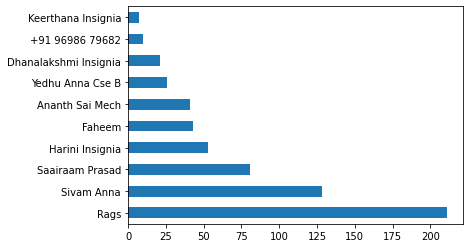

In [65]:
author_value_counts = df['Author'].value_counts() 
top_10_author_value_counts = author_value_counts.head(10) 
top_10_author_value_counts.plot.barh()

          Date      Time           Author          Message
38  2020-02-12   9:52 PM           Faheem  <Media omitted>
59  2020-02-12  10:53 PM           Faheem  <Media omitted>
69  2020-02-14   9:41 PM             Rags  <Media omitted>
92  2020-07-18  10:23 PM       Sivam Anna  <Media omitted>
141 2020-09-25   3:08 PM  Saairaam Prasad  <Media omitted>


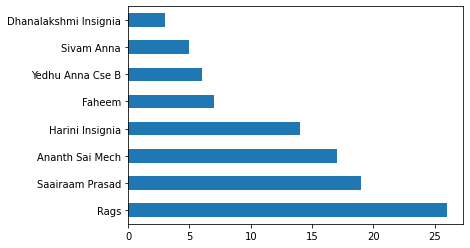

In [69]:
media_messages_df = df[df['Message'] == '<Media omitted>']
print(media_messages_df.head())

author_media_messages_value_counts = media_messages_df['Author'].value_counts()
top_10_author_media_messages_value_counts = author_media_messages_value_counts.head(10)
top_10_author_media_messages_value_counts.plot.barh()

In [73]:

null_authors_df = df[df['Author'].isnull()]
null_authors_df.head()

,Date,Time,Author,Message
0,2020-02-12,6:13 PM,None,"Sivam Anna created group ""Official Marketing T..."
1,2020-02-12,6:13 PM,None,Sivam Anna added you
2,2020-02-12,6:15 PM,None,Sivam Anna changed the group description
3,2020-02-12,6:13 PM,None,Sivam Anna changed this group's icon
4,2020-02-12,6:16 PM,None,Sivam Anna changed the group description


In [74]:
messages_df = df.drop(null_authors_df.index) 
messages_df = messages_df.drop(media_messages_df.index) 
messages_df.head()

,Date,Time,Author,Message
7,2020-02-12,6:18 PM,Sivam Anna,Okay.
8,2020-02-12,6:18 PM,Sivam Anna,Dear marketing team
9,2020-02-12,6:18 PM,Sivam Anna,Let's start with our daily social media activi...
10,2020-02-12,6:18 PM,Sivam Anna,Lets begin by opening a twitter handle
11,2020-02-12,6:19 PM,Sivam Anna,And also by continuously updating on Instagram.


In [76]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df

,Date,Time,Author,Message,Letter_Count,Word_Count
7,2020-02-12,6:18 PM,Sivam Anna,Okay.,5,1
8,2020-02-12,6:18 PM,Sivam Anna,Dear marketing team,19,3
9,2020-02-12,6:18 PM,Sivam Anna,Let's start with our daily social media activi...,50,8
10,2020-02-12,6:18 PM,Sivam Anna,Lets begin by opening a twitter handle,38,7
11,2020-02-12,6:19 PM,Sivam Anna,And also by continuously updating on Instagram.,47,7
...,...,...,...,...,...,...
747,2020-11-08,8:01 PM,Shakti Mama,Wow🔥 congrats🎉,14,2
748,2020-11-08,8:01 PM,+91 86829 70421,🔥🔥🔥,3,1
749,2020-11-08,8:03 PM,+91 73589 75149,🥳,1,1
750,2020-11-08,8:10 PM,Ananth Sai Mech,🔥,1,1


Text(0, 0.5, 'Authors')

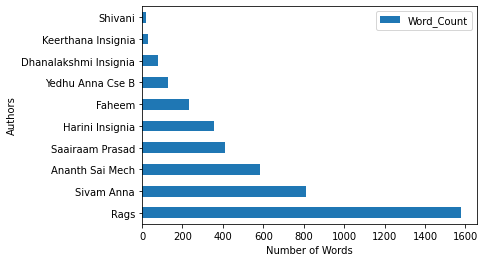

In [85]:
total_word_count_grouped_by_author = messages_df[['Author', 'Word_Count']].groupby('Author').sum()
sorted_total_word_count_grouped_by_author = total_word_count_grouped_by_author.sort_values('Word_Count', ascending=False)
top_10_sorted_total_word_count_grouped_by_author = sorted_total_word_count_grouped_by_author.head(10)
top_10_sorted_total_word_count_grouped_by_author.plot.barh()
plt.xlabel('Number of Words')
plt.ylabel('Authors')

Text(0, 0.5, 'Date')

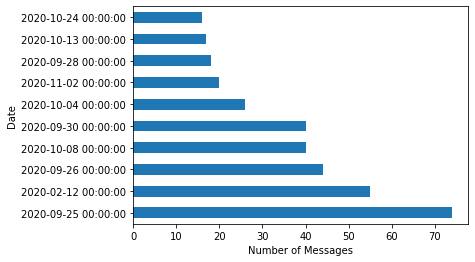

In [86]:
messages_df['Date'].value_counts().head(10).plot.barh() 
plt.xlabel('Number of Messages')
plt.ylabel('Date')

Text(0, 0.5, 'Time')

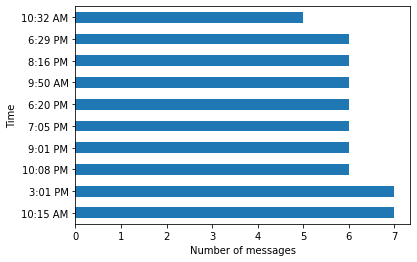

In [87]:
messages_df['Time'].value_counts().head(10).plot.barh() 
plt.xlabel('Number of messages')
plt.ylabel('Time')

Text(0, 0.5, 'Hour of Day')

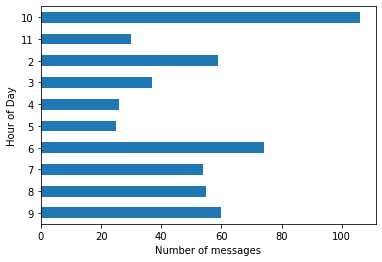

In [89]:
messages_df['Hour'] = messages_df['Time'].apply(lambda x : x.split(':')[0]) 
messages_df['Hour'].value_counts().head(10).sort_index(ascending=False).plot.barh()
plt.xlabel('Number of messages')
plt.ylabel('Hour of Day')